<a href="https://colab.research.google.com/github/ThuyHaLE/Regression/blob/main/Non_linear_regression_(Polynomial_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

#Functions

##Linear Regression

In [148]:
class LinearRegression :
  def __init__ ( self , X_data , y_target , minibatch_size =20, learning_rate =0.001 , num_epochs =10000) :
    self.X_data = np.array(X_data)
    self.y_target = np.array(y_target)
    self.batch_size = minibatch_size
    self.learning_rate = learning_rate
    self.num_epochs = num_epochs
    self.num_samples = self.X_data.shape[0]
    self.theta = np.random.randn(self.X_data.shape[1],1)
    self.thetas_path = [self.theta]
    self.losses = []
  def compute_loss (self, y_pred , y_target ) :
    loss = 1/2*(y_pred - y_target)*(y_pred - y_target)
    loss = np.mean(loss)
    return loss
  def predict (self, X_data ):
    y_pred = X_data.dot (self.theta)
    return y_pred
  def fit ( self ) :
    for epoch in range(self.num_epochs) :
      self.shuffled_indices = np. random.permutation (self.num_samples)
      self.X_b_shuffled = self.X_data[self.shuffled_indices]
      self.y_shuffled = self.y_target[self.shuffled_indices]
      for i in range (0 , self.num_samples , self.batch_size):
        self.xi = self.X_b_shuffled[ i : i + self.batch_size]
        self.yi = self.y_shuffled[ i: i + self.batch_size]
        yi_hat = self.predict(self.xi)
        loss = self.compute_loss (yi_hat, self.yi)
        self.losses.append(loss)
        print (f'Epoch : { epoch } - Loss : {loss}')
        gradients = self.xi.T.dot(yi_hat - self.yi)/self.batch_size
        self.theta = self.theta - self.learning_rate*(gradients)
        self.thetas_path.append (self.theta)
    return self.thetas_path, self.losses
  def best_parameter(self) :
    self.best_loss = min(self.losses)
    self.index_best_loss = self.losses.index(self.best_loss)
    self.best_theta = self.thetas_path[self.index_best_loss]
    print(f'number of losses: {len(self.losses)}')
    print(f'best loss is {self.best_loss} with index is {self.index_best_loss} and best theta is {self.best_theta}')
    return self.best_loss, self.best_theta
  def plot_losses(self):
    plt.plot(self.losses, color ="r")
    plt.plot(self.index_best_loss,self.best_loss,'bo', markersize=2, label='best loss')
    plt.show()

##Polynomial Features
The trend of data is not really linear: Linear Regression => Polynomial Regression

Linear Regression: $f(x) = \theta x + b$

Polynomial Regression: $f(x) = \theta x + \theta x^2 + b$.

When we replace the  $x$ with $x_1$, $x^2$ with $x_2$, we have $f(x) = \theta_1 x_1 + \theta_2 x_2 + b$. We can deal with it as a Linear Regression.

New features: (ex: from 3 original features $x_1, x_2, x_3$ we will have 7 new features)
- The bias b (the value of 1.0)
- Values raised to a power for each degree $(x_1)^2, (x_2)^2, (x_3)^2$
- Interactions between all pairs of features $x_1x_2, x_1x_3, x_2x_3$

In [149]:
def create_polynomial_features (X , degree =2) :
  X = np.array(X)
  from itertools import combinations
  features_no = X.shape[1]
  bias = np.ones(len(X),)
  X_mem = []

  if features_no == 1:
    X_mem = np.concatenate((X, pow(X,degree)), axis=1)

  else:
    for i in range(features_no):
      X_mem.append(X[:,i]**degree)
    for com_ in combinations(np.arange(features_no).tolist(), 2):
      X_mem.append(X[:,com_[0]]*X[:,com_[1]])
      X_mem = np.c_[X_mem].T
  return np.c_[bias,X_mem]

##The coefficient of determination ($R^2$)
$R^2 = 1 - \dfrac{RSS}{TSS} = 1 - \dfrac{\qquad \sum_{i}^N (y_i -\hat{y}_i)^2}{\qquad \sum_{i}^N (y_i -\bar{y}_i}$

RSS (Total sum squared residuals):$\qquad \sum_{i}^N (y_i -\hat{y}_i)^2$

TSS (Total sum of squared):$\qquad \sum_{i}^N (y_i -\bar{y}_i)^2$

In [150]:
def r2score ( y_pred , y ) :
  rss = np.sum ((y_pred-y)*(y_pred-y))
  tss = np.sum ((y-y.mean())*(y-y.mean()))
  r2 = 1 - (rss/tss)
  return r2

##Convert categories to numbers


In [151]:
# One Hot Encoding
def onehot_encode(X):
  return pd.get_dummies(X)
# Label Encoding
def label_encode(X):
  return X.astype('category').cat.codes

#Results

In [ ]:
files.upload()

In [154]:
#Read data
data = pd.read_csv('FuelConsumptionCo2.csv') #source: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [155]:
data = data.drop('MODELYEAR', axis=1)
data.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [156]:
#Convert categories to numbers
data['MAKE'] = label_encode(data['MAKE'])
data['MODEL'] = label_encode(data['MODEL'])
data['VEHICLECLASS'] = label_encode(data['VEHICLECLASS'])
data['TRANSMISSION'] = label_encode(data['TRANSMISSION'])
data['FUELTYPE'] = label_encode(data['FUELTYPE'])
data

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,329,0,2.0,4,10,3,9.9,6.7,8.5,33,196
1,0,329,0,2.4,4,20,3,11.2,7.7,9.6,29,221
2,0,330,0,1.5,4,17,3,6.0,5.8,5.9,48,136
3,0,389,11,3.5,6,11,3,12.7,9.1,11.1,25,255
4,0,483,11,3.5,6,11,3,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
1062,38,624,11,3.0,6,11,2,13.4,9.8,11.8,24,271
1063,38,624,11,3.2,6,11,2,13.2,9.5,11.5,25,264
1064,38,625,11,3.0,6,11,2,13.4,9.8,11.8,24,271
1065,38,625,11,3.2,6,11,2,12.9,9.3,11.3,25,260


In [157]:
data.describe()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,17.223055,331.014995,6.337395,3.346298,5.794752,9.670103,2.269916,13.296532,9.474602,11.580881,26.441425,256.228679
std,10.937264,188.664368,5.095388,1.415895,1.797447,6.673143,0.722374,4.101253,2.794510,3.485595,7.468702,63.372304
min,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,7.000000,173.000000,2.000000,2.000000,4.000000,2.000000,2.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,15.000000,324.000000,6.000000,3.400000,6.000000,11.000000,2.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,26.000000,502.500000,11.000000,4.300000,8.000000,13.000000,3.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,38.000000,662.000000,15.000000,8.400000,12.000000,21.000000,3.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [158]:
#find the pairwise correlation of all columns
data.corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MAKE,1.00,0.04,0.01,-0.17,-0.20,0.19,0.02,-0.25,-0.17,-0.22,0.23,-0.19
MODEL,0.04,1.00,0.24,0.10,0.08,-0.00,-0.05,0.15,0.18,0.16,-0.15,0.16
VEHICLECLASS,0.01,0.24,1.00,0.24,0.21,-0.17,-0.08,0.35,0.43,0.38,-0.35,0.39
ENGINESIZE,-0.17,0.10,0.24,1.00,0.93,-0.27,0.06,0.83,0.78,0.82,-0.81,0.87
CYLINDERS,-0.20,0.08,0.21,0.93,1.00,-0.25,0.13,0.80,0.72,0.78,-0.77,0.85
TRANSMISSION,0.19,-0.00,-0.17,-0.27,-0.25,1.00,0.21,-0.35,-0.35,-0.35,0.34,-0.30
FUELTYPE,0.02,-0.05,-0.08,0.06,0.13,0.21,1.00,-0.13,-0.18,-0.15,0.01,0.08
FUELCONSUMPTION_CITY,-0.25,0.15,0.35,0.83,0.80,-0.35,-0.13,1.00,0.97,1.00,-0.94,0.90
FUELCONSUMPTION_HWY,-0.17,0.18,0.43,0.78,0.72,-0.35,-0.18,0.97,1.00,0.99,-0.89,0.86
FUELCONSUMPTION_COMB,-0.22,0.16,0.38,0.82,0.78,-0.35,-0.15,1.00,0.99,1.00,-0.93,0.89


In [163]:
#Creating train and test dataset
msk = np.random.rand(len(data)) < 0.8
data_train = data[msk]
data_test = data[~msk]

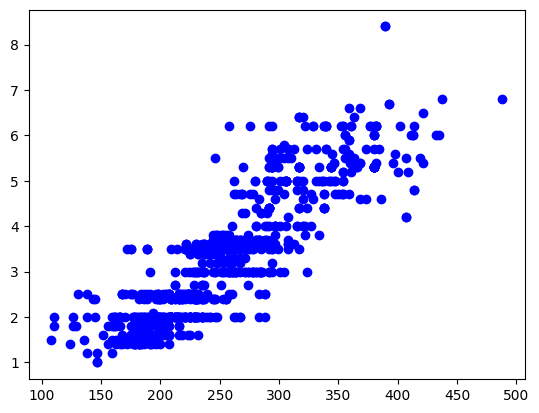

In [164]:
X_train = data_train[['ENGINESIZE']]
Y_train = data_train[['CO2EMISSIONS']]
X_test = data_test[['ENGINESIZE']]
Y_test = data_test[['CO2EMISSIONS']]
plt.scatter(Y_train, X_train , c ="blue")

##Linear Regression: $f(x) = \theta x + b$

Streaming output truncated to the last 5000 lines.
Epoch : 9821 - Loss : 649.7119923770339
Epoch : 9821 - Loss : 776.3621027695776
Epoch : 9821 - Loss : 650.1270933889771
Epoch : 9821 - Loss : 338.6438936583337
Epoch : 9821 - Loss : 650.4434033133801
Epoch : 9821 - Loss : 744.4758169090717
Epoch : 9821 - Loss : 471.73966654969314
Epoch : 9821 - Loss : 218.78096397675108
Epoch : 9821 - Loss : 230.43717923810408
Epoch : 9821 - Loss : 352.74973079816
Epoch : 9821 - Loss : 373.8251937588725
Epoch : 9821 - Loss : 384.08799381654296
Epoch : 9821 - Loss : 417.1570223445674
Epoch : 9822 - Loss : 302.0587898398139
Epoch : 9822 - Loss : 384.1076420391955
Epoch : 9822 - Loss : 447.2655717967805
Epoch : 9822 - Loss : 585.4168921494738
Epoch : 9822 - Loss : 314.51107825526043
Epoch : 9822 - Loss : 414.1674013732149
Epoch : 9822 - Loss : 576.8141452543548
Epoch : 9822 - Loss : 313.53308174111226
Epoch : 9822 - Loss : 536.6877448953234
Epoch : 9822 - Loss : 633.2367776166218
Epoch : 9822 - Loss : 452

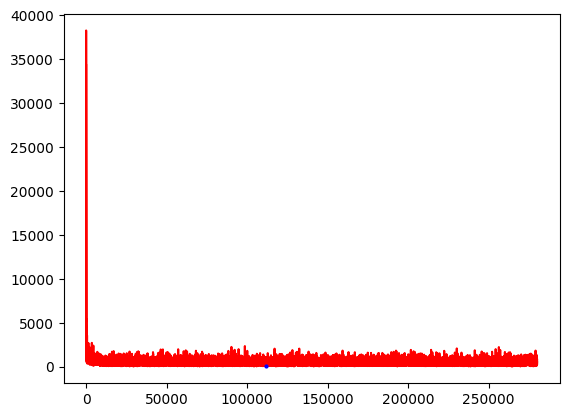

In [165]:
#Training
X_train_ = np.c_[np.ones(len(X_train),),X_train]
model = LinearRegression(X_train_, Y_train, learning_rate =0.001 ,minibatch_size =32, num_epochs =10000)
model.fit()
best_loss, best_theta = model.best_parameter()
model.plot_losses()

Text(0, 0.5, 'Emission')

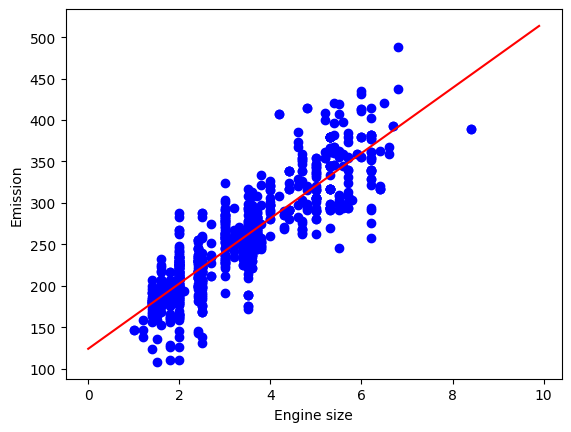

In [168]:
plt.scatter(X_train, Y_train,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = best_theta[0][0] + (best_theta[1][0]*XX)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [169]:
#Testing
X_test_ = np.c_[np.ones(len(X_test),),X_test]
y_pred = X_test_.dot(best_theta)

In [170]:
#Evaluation
print("R2-score: %.2f" % r2score(y_pred, Y_test))

R2-score: 0.73


##Polynomial Regression: $f(x) = \theta x + \theta x^2 + b$.

Streaming output truncated to the last 5000 lines.
Epoch : 9821 - Loss : 283.6695329135971
Epoch : 9821 - Loss : 489.09402411639485
Epoch : 9821 - Loss : 380.9376269046257
Epoch : 9821 - Loss : 445.18958716778883
Epoch : 9821 - Loss : 436.23313409062473
Epoch : 9821 - Loss : 311.5620639334745
Epoch : 9821 - Loss : 258.31045846981294
Epoch : 9821 - Loss : 481.5753083340988
Epoch : 9821 - Loss : 378.61744821887225
Epoch : 9821 - Loss : 409.22327992784875
Epoch : 9821 - Loss : 944.6565728669058
Epoch : 9821 - Loss : 139.44086567845224
Epoch : 9822 - Loss : 305.0611467470658
Epoch : 9822 - Loss : 612.4808866356015
Epoch : 9822 - Loss : 513.5891720269659
Epoch : 9822 - Loss : 332.92162587249385
Epoch : 9822 - Loss : 329.92395855619776
Epoch : 9822 - Loss : 600.9425390844112
Epoch : 9822 - Loss : 473.0118136079506
Epoch : 9822 - Loss : 631.3145384548052
Epoch : 9822 - Loss : 509.6176848560702
Epoch : 9822 - Loss : 475.2431025016282
Epoch : 9822 - Loss : 300.1104413546493
Epoch : 9822 - Loss 

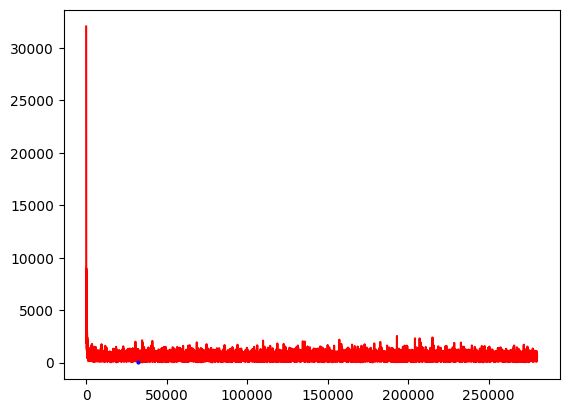

In [171]:
#Training
polynomial_features = create_polynomial_features (X_train, degree =2)
model = LinearRegression(polynomial_features, Y_train, learning_rate =0.001 ,minibatch_size =32, num_epochs =10000)
model.fit()
best_loss, best_theta = model.best_parameter()
model.plot_losses()

Text(0, 0.5, 'Emission')

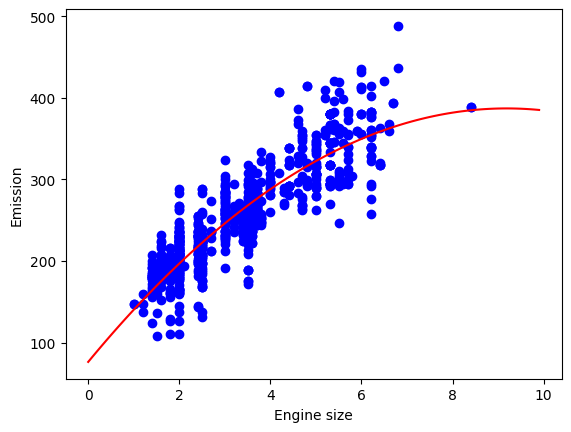

In [172]:
plt.scatter(X_train, Y_train,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = best_theta[0][0] + (best_theta[1][0]*XX) + (best_theta[2][0]*np.power(XX, 2))
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [173]:
#Testing
X_test_ = create_polynomial_features(X_test, degree =2)
y_pred = X_test_.dot(best_theta)

In [174]:
#Evaluation
print("R2-score: %.2f" % r2score(y_pred, Y_test))

R2-score: 0.73
